# Review<a class="tocSkip">

Hello, Patricia!

My name is Yaroslav. I'm going to review your project and try to help you make it even better! Let's get started!

You can find my comments in <span style="color:green">green</span>, <span style="color:yellow">yellow</span> and <span style="color:red">red</span> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done successfully.
</div>

<div class="alert alert-block alert-warning">
<b>Improve:</b> if i can give some recommendations to improve your project.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Project can't be accepted with the red comments.
</div>

Please don't delete my comments. If you have any questions, please write them and I will be happy to help you! For example, you can use <span style="color:blue">blue</span> boxes like this: 

<div class="alert alert-block alert-info">
Student's comment.
</div>

### <span style="color:orange">General feedback</span><a class="tocSkip">

- Nice project! I really liked your approach to work!
- The project is well structured!
- The project has the correct visualization.
- I've found some tiny mistakes in your project. They'll be easy to fix.
- Please add some comments at the end of the steps. The skill of writing conclusions is very important for an analyst.
- I've left an "improve" comments, which could help you to polish your project and further develop your skills. It doesn't mean that you've done something wrong, it just contains some advice on how it could be improved.

### <span style="color:orange">General feedback (v2)</span><a class="tocSkip">

- The project is almost ready! I left a couple of new comments about testing hypotheses, please take a look.
    
### <span style="color:orange">General feedback (v3)</span><a class="tocSkip">

- The project is perfectly finalized, thank you for your time!

The project is accepted, good luck in further education!

---

# Analyzing Revenue between Megaline Prepaid Plans: Surf and Ultimate

The main purpose of this report is to find the plan which brings most revenue to Megaline, based on the data we have been provided. This data is a small sample set of 500 unique customers. The conclusions withdrawn from this sample set will represent as well its original dataset.

**TABLE OF CONTENTS**

* [1. Opening Data Files](#chapter1)
* [2. Data Preprocessing](#chapter2)
    * [2.1 Missing Values](#section_2_1)
    * [2.2 Data Types](#section_2_2)
    * [2.3 Duplicates](#section_2_3)
    * [2.4 Categorizing Data](#section_2_4)
* [3. Exploring and Analyzing Data](#chapter3)
* [4. Testing Hypotheses](#chapter4)
* [5. Final Conclusion](#chapter5)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

Great introduction!

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

It is also useful to clearly state the purpose of our research at the beginning.

</div>


## Opening Data Files <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")

In [2]:
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [3]:
internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [4]:
messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [5]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


We have the data split into 5 tables. We already know that there are 500 users, but some tables have thousands of rows due to multiple times a text message, a call or web usage was done per user. Luckily, we will be able to group these rows by the users' unique ids, "user_id", which is included in the tables below: 

* Users
* Calls
* Internet
* Messages

After grouping the data within each table, we will be able to merge using the common column(s).

As per "plans", we will be able to link it to the users table via the columns "plan_name" and "plan".

We have also seen some missing values already, as well as null. Let's start with the data preprocessing.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

Nice first look at raw data!

</div>


## Data Preprocessing <a class="anchor" id="chapter2"></a>

### Missing Values <a class="anchor" id="section_2_1"></a>

In [7]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [8]:
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [9]:
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [10]:
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [11]:
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

We already see that in **users** table, "churn_date" has missing values, 466 to be exact. From the Project description, we understad this missing data belongs to users who are still using one of Megaline's plans. Therefore, we will not treat them as missing values.

The other tables don't have missing values. Let's have a look at the data types.

### Data Types <a class="anchor" id="section_2_2"></a>

**USERS**

In [12]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


We should change the data type of "reg_date" and "churn_date" to datetime. 

In [14]:
users["reg_date"] = pd.to_datetime(users["reg_date"], format="%Y-%m-%d")
users["churn_date"] = pd.to_datetime(users["churn_date"], format="%Y-%m-%d")
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**CALLS**

In [15]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [16]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
calls["call_date"] = pd.to_datetime(calls["call_date"], format="%Y-%m-%d")
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


As the project description says, every second is rounded up to the full minute. We need to round up the duration column, and then change the data type to integer.

In [18]:
import numpy as np
calls["duration"] = np.ceil(calls["duration"]).astype("int")

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

Well done for not forgetting about rounding up calls! This is a critical point in this project.

</div>


Now that we have rounded up the duration of the calls, let's have a look at how the values look:

In [19]:
calls["duration"].value_counts()

0     26834
6      7848
5      7778
7      7769
8      7718
4      7434
9      7357
3      6942
10     6918
2      6446
11     6407
1      5795
12     5750
13     5070
14     4402
15     3889
16     3011
17     2461
18     1992
19     1604
20     1243
21      910
22      671
23      461
24      324
25      235
26      157
27      118
28       62
29       58
30       27
31       18
32       13
33        6
36        3
34        2
37        1
38        1
Name: duration, dtype: int64

In [20]:
26834 / 137735

0.1948233927469416

We have a considerable amount of calls that didn't even last a second: 26834. Most probably, missed calls. They represent almost 20% of the data, which is a portion too big and therefore relevant to keep it. It could help us make hypothesis or conclusions later on. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

OK, I agree with the decision.

</div>


**INTERNET**

In [21]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [22]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


For the internet table we will do the same; change session_date to datetime type now, but we will convert the mbs into gbs after grouping the data per month, as this is how Megaline rounds up the mb into gb.

In [23]:
internet["session_date"] = pd.to_datetime(internet["session_date"], format="%Y-%m-%d")
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

Please note that 1 GB = 1024 MB.

</div>


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b>

<s>Also in this case, it's a bit of a wrong approach. See, according to the terms of the operator "For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.". That is, we need to first group the data by month, then change it into gigabytes and round it up. Otherwise, we get this situation - I spent 50 MB per session, the operator rounded up to 1 GB, and took the money. On the same day, I used up another 100 MB-the operator rounded it up again and took money for 1 GB. Very greedy operator 😂

</div>


<div class="alert alert-block alert-info">
Thanks for the clarification! :) i will use the code to convert to gb and round up after grouping. 
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

Now everything is correct!

</div>


In [24]:
internet["mb_used"].value_counts()

0.00      13747
414.46        8
435.77        8
417.46        7
313.79        7
          ...  
638.12        1
217.39        1
683.90        1
243.97        1
563.11        1
Name: mb_used, Length: 57624, dtype: int64

There is also a considerable amount of users who have not used internet. It could be due to users being "seniors" and not being used to use the internet on a small device like the phone, or even them not having smartphones.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

Please leave a comment about zero internet sessions. Why could they appear and what is better to do with them?

</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

👍

</div>


**MESSAGES**

In [25]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [26]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
messages["message_date"] = pd.to_datetime(messages["message_date"], format="%Y-%m-%d")
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [28]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [29]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


We have now polished the data types, and rounded up the seconds and the megabytes, in order to be paired with the Project description, and ease the analysis later on.

### Duplicates <a class="anchor" id="section_2_3"></a>

Let's see first if we find any duplicates in any of the tables:

In [30]:
users["first_name"]= users["first_name"].str.lower()
users["last_name"]= users["last_name"].str.lower()
users["city"]= users["city"].str.lower()
users["plan"]= users["plan"].str.lower()

In [31]:
users.duplicated().sum()

0

In [32]:
calls.duplicated().sum()

0

In [33]:
internet.duplicated().sum()

0

In [34]:
messages.duplicated().sum()

0

In [35]:
plans.duplicated().sum()

0

We haven't found any duplicated values in any of the datasets. Only "users" table had to be converted to lower strings in order to be certain about it. 
Now it's time to group data!

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

Well done for checking the tables for duplicates. It is important to always do this.

</div>


### Categorizing Data <a class="anchor" id="section_2_4"></a>

For each user, find:

* The number of calls made and minutes used per month
* The number of text messages sent per month
* The volume of data per month
* The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

**Number of calls and minutes per user per month**

In [36]:
calls_new = calls.copy()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

Please note that if you wanted to make a copy of the `calls` dataframe, you need to use the `.copy()` method to make changes to the copy, and leave the `calls` dataframe in its original form. Otherwise, we just create a new link to the old dataframe and all changes are made to it.

>`calls_new = calls.copy()`
</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

👍

</div>


In [37]:
calls_new["call_date"] = pd.DatetimeIndex(calls["call_date"]).month
calls_new.head()

,id,user_id,call_date,duration
0,1000_93,1000,12,9
1,1000_145,1000,12,14
2,1000_247,1000,12,15
3,1000_309,1000,12,6
4,1000_380,1000,12,5


To simplify analysis later on, without having to lose previous data, we have created a new df in which the "call_date" is replaced by the number of the month.

Now we need to group by user and month in order to find out how many calls and minutes were made by each unique user.

In [38]:
calls_new.columns = ["id", "user_id", "month", "duration"]
calls_new

,id,user_id,month,duration
0,1000_93,1000,12,9
1,1000_145,1000,12,14
2,1000_247,1000,12,15
3,1000_309,1000,12,6
4,1000_380,1000,12,5
...,...,...,...,...
137730,1499_199,1499,11,9
137731,1499_200,1499,10,11
137732,1499_201,1499,9,9
137733,1499_202,1499,10,1


In [39]:
# Minutes used per user per month
calls_new = calls_new.groupby(['user_id','month']).agg({"user_id":"count", "duration":"sum"})

In [40]:
calls_new.columns = ["number_calls", "duration"]
calls_new

number_calls  duration
user_id month                        
1000    12               16       124
1001    8                27       182
        9                49       315
        10               65       393
        11               64       426
...                     ...       ...
1498    12               39       339
1499    9                41       346
        10               53       385
        11               45       308
        12               65       496

[2258 rows x 2 columns]

After grouping, we have reduced the dataset to 2258 rows.

**Number of text messages sent per user per month**

In [41]:
messages_new = messages.copy()

In [42]:
messages_new["message_date"] = pd.DatetimeIndex(messages_new["message_date"]).month
messages_new.head()

,id,user_id,message_date
0,1000_125,1000,12
1,1000_160,1000,12
2,1000_223,1000,12
3,1000_251,1000,12
4,1000_255,1000,12


In [43]:
messages_new.columns = ["id", "user_id", "month"]
messages_new = messages_new.groupby(['user_id','month']).agg({"user_id":"count"})
messages_new

user_id
user_id month         
1000    12          11
1001    8           30
        9           44
        10          53
        11          36
...                ...
1496    9           21
        10          18
        11          13
        12          11
1497    12          50

[1806 rows x 1 columns]

In [44]:
messages_new.columns = ["number_of_messages"]
messages_new

number_of_messages
user_id month                    
1000    12                     11
1001    8                      30
        9                      44
        10                     53
        11                     36
...                           ...
1496    9                      21
        10                     18
        11                     13
        12                     11
1497    12                     50

[1806 rows x 1 columns]

You can see in the above table the messages sent per user per month.

**Volume of data (in GB) per user per month**

In [45]:
internet_new = internet.copy()
internet_new

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [46]:
internet_new["session_date"] = pd.DatetimeIndex(internet_new["session_date"]).month

In [47]:
internet_new.columns = ["id", "user_id", "month", "mb_used"]
internet_new["month"].value_counts()

12    23492
11    18651
10    16193
9     12722
8     10718
7      8110
6      6057
5      4288
4      2558
3      1336
2       604
1        96
Name: month, dtype: int64

In [48]:
internet_new = internet_new.groupby(['user_id','month']).agg({"mb_used":"sum"})
internet_new["mb_used"] = internet_new["mb_used"] / 1024

In [49]:
#change session data column name to "month" 
internet_new.columns=["gb_used"]

In [50]:
internet_new["gb_used"] = np.ceil(internet_new["gb_used"]).astype("int")

In [51]:
internet_new

gb_used
user_id month         
1000    12           2
1001    8            7
        9           14
        10          22
        11          19
...                ...
1498    12          23
1499    9           13
        10          20
        11          17
        12          22

[2277 rows x 1 columns]

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

All pivot tables are created correctly!

</div>


We now have the table showing the GB used per user per month. 

Now that we have grouped the tables per user and per month, we can merge them and see the overall revenue made from each user per month and per service (calls, messages, internet).

**The monthly revenue from each user**
First, we should merge the new tables we created for calls, messages and internet. We will do that by keeping their common columns as base (user_id and month)

(subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)**

In [52]:
total1= pd.merge(left = internet_new , 
                right = calls_new, how='outer',on=['user_id', 'month']).fillna(0)
service_used=pd.merge(left = total1 , 
                right = messages_new, how='outer',on=['user_id', 'month']).fillna(0)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

Table joins are also correct.

</div>


In [53]:
service_used = service_used.reset_index()

We now have a table displaying all the data, messages, calls and their duration per user per month. It is time to calculate the revenue.

In [54]:
service_used

,user_id,month,gb_used,number_calls,duration,number_of_messages
0,1000,12,2.0,16.0,124.0,11.0
1,1001,8,7.0,27.0,182.0,30.0
2,1001,9,14.0,49.0,315.0,44.0
3,1001,10,22.0,65.0,393.0,53.0
4,1001,11,19.0,64.0,426.0,36.0
...,...,...,...,...,...,...
2288,1470,11,0.0,81.0,632.0,156.0
2289,1470,12,0.0,78.0,592.0,153.0
2290,1484,11,0.0,2.0,38.0,1.0
2291,1491,4,0.0,8.0,44.0,6.0


In [55]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,NaT
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,fidel,sharpe,67,"new york-newark-jersey city, ny-nj-pa msa",2018-09-04,surf,NaT
496,1496,ariel,shepherd,49,"new orleans-metairie, la msa",2018-02-20,surf,NaT
497,1497,donte,barrera,49,"los angeles-long beach-anaheim, ca msa",2018-12-10,ultimate,NaT
498,1498,scot,williamson,51,"new york-newark-jersey city, ny-nj-pa msa",2018-02-04,surf,NaT


We now have service_used table, which shows how much of each service (calls, messages and internet) has been used per user per month, and the users table. In order to calculate revenue, we need to know what plan each user is using, so we need to do another merge of these 2 tables. 

In [56]:
revenue= pd.merge(left = users , 
                right = service_used, how='outer',on=['user_id'])

In [57]:
revenue.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,gb_used,number_calls,duration,number_of_messages
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,12.0,2.0,16.0,124.0,11.0
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,8.0,7.0,27.0,182.0,30.0
2,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,9.0,14.0,49.0,315.0,44.0
3,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,10.0,22.0,65.0,393.0,53.0
4,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,11.0,19.0,64.0,426.0,36.0
5,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,12.0,19.0,56.0,412.0,44.0
6,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,10.0,7.0,11.0,59.0,15.0
7,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,11.0,19.0,55.0,386.0,32.0
8,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,12.0,15.0,47.0,384.0,41.0
9,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,NaT,12.0,27.0,149.0,1104.0,50.0


In [58]:
revenue = revenue.fillna(0)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b>

<s>Please note that the gaps in the table are not filled in. You need to do this:
    
>`revenue = revenue.fillna(0)`

</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

👍

</div>


Let's do a quick data type update here, before we calculate revenue

Let's do a recap of the plans:

SURF

- Monthly 20 USD
- 500 monthly minutes, 50 texts, and 15 GB of data.
- After exceeding the package limits:
    * 1 minute: 3 cents
    * 1 text message: 3 cents
    * 1 GB of data: 10 USD

ULTIMATE

- Monthly charge: 70 USD
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:
    * 1 minute: 1 cent
    * 1 text message: 1 cent
    * 1 GB of data: 7 USD

First we need to substract the volume of calls, messages and data included in the plan from each user per month. The result will be added to a new column "extra useage". Then, we will multiply the values of that "extra usage" column for the correspondent fees, based on the plan the user has. 

In [59]:
#Surf Plan
surf_minutes = 500
surf_messages = 50
surf_data = 15
surf_minute_fee = 0.03
surf_message_fee = 0.03
surf_data_fee = 10

#Ultimate Plan
ultimate_minutes = 3000
ultimate_messages = 1000
ultimate_data = 30
ultimate_minute_fee = 0.01
ultimate_message_fee = 0.01
ultimate_data_fee = 7

def cost(row):
    #Surf Plan
    surf_minutes = 500
    surf_messages = 50
    surf_data = 15
    surf_minute_fee = 0.03
    surf_message_fee = 0.03
    surf_data_fee = 10

    #Ultimate Plan
    ultimate_minutes = 3000
    ultimate_messages = 1000
    ultimate_data = 30
    ultimate_minute_fee = 0.01
    ultimate_message_fee = 0.01
    ultimate_data_fee = 7
    
    monthly_calls = row["number_calls"]
    monthly_minutes = row["duration"]
    monthly_messages = row["number_of_messages"]
    monthly_data = row["gb_used"]
    plan = row["plan"]
        
    plan_cost = 0
    call_cost = 0
    message_cost = 0
    data_cost = 0
        
        
    if plan == "surf":
        plan_cost = 20
        if monthly_minutes <= surf_minutes:
            call_cost = 0
        else:
            call_cost = plan_cost+(monthly_minutes-surf_minutes) * surf_minute_fee
        
        if monthly_messages <= surf_messages:
            message_cost = 0
        else:
            message_cost = plan_cost+(monthly_messages-surf_messages)*ultimate_message_fee
        
        if monthly_data <= surf_data:
            data_cost = 0
        else:
            data_cost = plan_cost+(monthly_data-surf_data)*surf_data_fee
            
    elif plan == "ultimate":
        
        plan_cost = 70
        if monthly_minutes <= ultimate_minutes:
            call_cost = 0
        else:
            call_cost = plan_cost+(monthly_minutes - ultimate_minutes)*ultimate_minute_fee
        
        if monthly_messages <= ultimate_messages:
            message_cost = 0
        else:
            message_cost = plan_cost+(monthly_messages-ultimate_messages)*ultimate_message_fee
        
        if monthly_data <= ultimate_data:
            data_cost = 0
        else:
            data_cost = plan_cost+(monthly_data-ultimate_data)*ultimate_data_fee
    
    monthly_rev = plan_cost + call_cost + message_cost + data_cost
    return monthly_rev

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

The function is good. It would be great to enter tariff indicators (such as 20, 500, etc.) not manually, but to make them in the form of links to a table with tariffs.

</div>


In [60]:
revenue['monthly_rev']=revenue.apply(cost,axis=1)
revenue

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,gb_used,number_calls,duration,number_of_messages,monthly_rev
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,0,12.0,2.0,16.0,124.0,11.0,70.00
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,0,8.0,7.0,27.0,182.0,30.0,20.00
2,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,0,9.0,14.0,49.0,315.0,44.0,20.00
3,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,0,10.0,22.0,65.0,393.0,53.0,130.03
4,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,0,11.0,19.0,64.0,426.0,36.0,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,scot,williamson,51,"new york-newark-jersey city, ny-nj-pa msa",2018-02-04,surf,0,12.0,23.0,39.0,339.0,0.0,120.00
2299,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,0,9.0,13.0,41.0,346.0,0.0,20.00
2300,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,0,10.0,20.0,53.0,385.0,0.0,90.00
2301,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,0,11.0,17.0,45.0,308.0,0.0,60.00


In [61]:
revenue_pivot = revenue.pivot_table(index=["user_id", "plan", "month"], values=["monthly_rev"], aggfunc="sum")

In [62]:
revenue_pivot

monthly_rev
user_id plan     month             
1000    ultimate 12.0         70.00
1001    surf     8.0          20.00
                 9.0          20.00
                 10.0        130.03
                 11.0         80.00
...                             ...
1498    surf     12.0        120.00
1499    surf     9.0          20.00
                 10.0         90.00
                 11.0         60.00
                 12.0        110.00

[2303 rows x 1 columns]

We now have a pivot table showing the total revenue per month per user, based on the plan they use.

In [63]:
revenue_surf = revenue[revenue["plan"]=="surf"]["monthly_rev"].sum()
revenue_surf

131730.56

In [64]:
revenue_ultimate = revenue[revenue["plan"]=="ultimate"]["monthly_rev"].sum()
revenue_ultimate

55216.0

We clearly see that the ultimate plan brings more revenue than the surf plan.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

After making changes to the pre-processing, the tariffs revenue will change.

</div>


<div class="alert alert-block alert-info">
Even though I converted mb to gb after grouping the data per user per month, the revenue hasn't changed too much...
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

It seems to me that it has changed significantly-about three times.
 
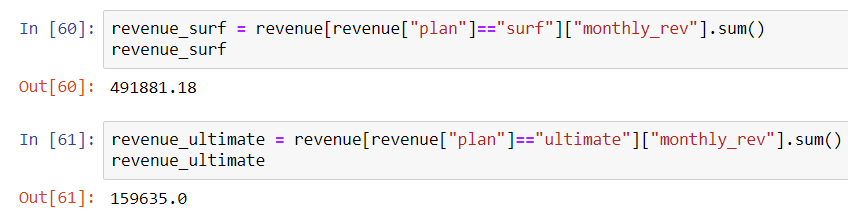

</div>


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b>

<s>It is also worth adding a small step conclusion - what was done.

</div>


In this chapter we checked for missing values and duplicates, to ensure we prepare the dataset to be as accurate as possible for the analysis. 
We then modified the data types (to date time and integers where necessary), and proceeded to group it by users and months. We calculated the monthly revenue from each user based on the plan each user had, and the result is in table "revenue_pivot" displayed above.

Also, the overall revenue per plan in 2018 is:

Surf users: 131,730.56 USD

Ultimate users: 55,216.0 USD

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

👍

</div>


## Exploring and Analyzing Data <a class="anchor" id="chapter3"></a>

Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.

In [65]:
import matplotlib.pyplot as plt

In [66]:
revenue.describe()

,user_id,age,month,gb_used,number_calls,duration,number_of_messages,monthly_rev
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,1246.214937,45.420756,9.132870,16.797221,59.806774,427.419453,33.022579,81.175232
std,143.044136,16.774962,2.562964,7.857946,32.572548,237.490294,34.065907,56.770784
min,1000.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,30.000000,8.000000,12.000000,38.000000,262.500000,3.000000,44.050000
50%,1245.000000,46.000000,10.000000,17.000000,60.000000,424.000000,25.000000,70.000000
75%,1368.000000,61.000000,11.000000,21.000000,79.000000,571.500000,51.000000,100.000000
max,1499.000000,75.000000,12.000000,70.000000,205.000000,1510.000000,266.000000,648.850000


We are working with a sample set that contains users between the ages of 18 and 75. These users give a range of revenue from 20usd to 1270 monthly. We will display this data using graphs, but before let's convert the data into more readable values.

In [67]:
revenue.isna().sum()

user_id               0
first_name            0
last_name             0
age                   0
city                  0
reg_date              0
plan                  0
churn_date            0
month                 0
gb_used               0
number_calls          0
duration              0
number_of_messages    0
monthly_rev           0
dtype: int64

We have some missing values as well. In churn_date, these represent users who are still using Megaline's services. In the rest of the columns we created previously, there are oly 10 missing values, so we might be looking at the same 10 users that we have no information about. 

In [68]:
revenue = revenue.fillna(0)

In [69]:
revenue["user_id"] = revenue["user_id"].astype("str")
revenue["month"] = revenue["month"].astype("int")
revenue["gb_used"] = revenue["gb_used"].astype("int")
revenue["number_calls"] = revenue["number_calls"].astype("int")
revenue["duration"] = revenue["duration"].astype("int")
revenue["number_of_messages"] = revenue["number_of_messages"].astype("int")

We have adjusted the data types. Now let's separate this dataframe into 2: one with surf users, and the other with ultimate users.

In [70]:
surf_users = revenue[revenue["plan"]=="surf"]
ultimate_users =revenue[revenue["plan"]=="ultimate"]

### Surf

In [71]:
surf_users_avg = surf_users.pivot_table(index="month", values=["gb_used", "duration", "number_of_messages"], aggfunc="mean")
surf_users_median = surf_users.pivot_table(index="month", values=["gb_used", "duration", "number_of_messages"], aggfunc="median")

In [72]:
surf_users_avg.round()

,duration,gb_used,number_of_messages
month,,,
0,0.0,0.0,0.0
1,203.0,5.0,10.0
2,297.0,12.0,12.0
3,330.0,14.0,15.0
4,352.0,12.0,17.0
5,400.0,14.0,24.0
6,431.0,15.0,25.0
7,450.0,17.0,27.0
8,410.0,17.0,29.0


In a previous step, We filled the missing values, which explains why we have some months as "0". Let's pull them up to try and figure out what is wrong with them.

In [73]:
surf_users[surf_users["month"]==0]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,gb_used,number_calls,duration,number_of_messages,monthly_rev
612,1129,marin,bolton,70,"baton rouge, la msa",2018-11-10,surf,2018-12-27 00:00:00,0,0,0,0,0,20.0
682,1143,lorina,stevens,69,"cincinnati, oh-ky-in msa",2018-10-26,surf,0,0,0,0,0,0,20.0
1418,1307,kristopher,lang,28,"boston-cambridge-newton, ma-nh msa",2018-12-31,surf,0,0,0,0,0,0,20.0
1466,1319,eliseo,carson,21,"colorado springs, co msa",2018-06-17,surf,0,0,0,0,0,0,20.0
1762,1378,mckinley,clayton,22,"denver-aurora-lakewood, co msa",2018-12-17,surf,0,0,0,0,0,0,20.0
2189,1473,kirk,velez,61,"louisville/jefferson county, ky-in msa",2018-12-31,surf,0,0,0,0,0,0,20.0


In [74]:
surf_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1579 entries, 1 to 2302
Data columns (total 14 columns):
user_id               1579 non-null object
first_name            1579 non-null object
last_name             1579 non-null object
age                   1579 non-null int64
city                  1579 non-null object
reg_date              1579 non-null datetime64[ns]
plan                  1579 non-null object
churn_date            1579 non-null object
month                 1579 non-null int64
gb_used               1579 non-null int64
number_calls          1579 non-null int64
duration              1579 non-null int64
number_of_messages    1579 non-null int64
monthly_rev           1579 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(6), object(6)
memory usage: 185.0+ KB


There are 6 records with "0" as a month. They account 0.37% of the surf_users dataset, so it will be easier to drop them.

In [75]:
surf_users = surf_users.drop(surf_users[surf_users.month ==0].index)

Now we can proceed.

In [76]:
surf_users_monthlyavg = surf_users.pivot_table(index="month", values=["gb_used", "duration", "number_of_messages"], aggfunc="mean")
surf_users_monthlymedian = surf_users.pivot_table(index="month", values=["gb_used", "duration", "number_of_messages"], aggfunc="median")

In [77]:
surf_users_monthlyavg.round()

,duration,gb_used,number_of_messages
month,,,
1,203.0,5.0,10.0
2,297.0,12.0,12.0
3,330.0,14.0,15.0
4,352.0,12.0,17.0
5,400.0,14.0,24.0
6,431.0,15.0,25.0
7,450.0,17.0,27.0
8,410.0,17.0,29.0
9,414.0,17.0,31.0


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

The zero month turned out to be very strange. Please check why it turned out and whether we need these lines.

</div>



<div class="alert alert-block alert-info">
I decided to drop these rows because I couldn't figure out the code to replace the "0" month for 12 for example (as 4 out of the 6 users with moonth 0 registered in december). Could you suggest how i could do that?
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

That's right - the best solution in this case is to delete these lines. They appeared when merging the tables, and then we filled them with zero. Therefore, it is better not to use these rows in the analysis.

</div>


In this pivot table we can observe the mean of calls duration, gb used and number of messages sent in a month by the users from the Surf plan. 

We can already see that December holds the highest mean in the 3 cases. This could be due to the Holidays season, as people tend to contact their beloved ones to send their best wishes. 

The month with the lowest mean in all 3 cases is January; following the previous hypothesis, it can be due to the fact that people have already been in touch with their circles in the previous month.

In [78]:
surf_users_monthlymedian

,duration,gb_used,number_of_messages
month,,,
1,203.0,5,10.5
2,254.0,12,3.0
3,334.0,14,7.0
4,339.5,12,10.0
5,415.0,14,15.0
6,423.0,16,15.0
7,454.0,17,20.0
8,392.0,17,20.0
9,426.0,17,22.5


In [79]:
import numpy as np
surf_users_var = np.var(surf_users).round()
surf_users_var

age                     277.0
month                     6.0
gb_used                  62.0
number_calls           1024.0
duration              54933.0
number_of_messages     1126.0
monthly_rev            4365.0
dtype: float64

In [80]:
surf_users_std = np.std(surf_users).round()
surf_users_std

age                    17.0
month                   2.0
gb_used                 8.0
number_calls           32.0
duration              234.0
number_of_messages     34.0
monthly_rev            66.0
dtype: float64

In [81]:
surf_users_avg = surf_users.mean().round()
surf_users_avg

user_id                 inf
age                    44.0
month                   9.0
gb_used                17.0
number_calls           60.0
duration              429.0
number_of_messages     31.0
monthly_rev            84.0
dtype: float64

The monthly use of the Surf plan shows overall a high variance, meaning the call duration, number of messages and data used is very spread from one month to another, especially the duration of the calls. The monthly revenue is also much higher in some months than others, as its dispersion is very high too.

The standard deviation is the square root of variance, so proportianlly it shows the same dispersion. 

### Ultimate

Now let's do the same for the ultimate users

In [82]:
ultimate_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 2287
Data columns (total 14 columns):
user_id               724 non-null object
first_name            724 non-null object
last_name             724 non-null object
age                   724 non-null int64
city                  724 non-null object
reg_date              724 non-null datetime64[ns]
plan                  724 non-null object
churn_date            724 non-null object
month                 724 non-null int64
gb_used               724 non-null int64
number_calls          724 non-null int64
duration              724 non-null int64
number_of_messages    724 non-null int64
monthly_rev           724 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(6), object(6)
memory usage: 84.8+ KB


In [83]:
ultimate_users[ultimate_users["month"]==0]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,gb_used,number_calls,duration,number_of_messages,monthly_rev
86,1025,jess,wilkinson,64,"atlanta-sandy springs-roswell, ga msa",2018-10-28,ultimate,0,0,0,0,0,0,70.0
1285,1269,irving,thompson,39,"dallas-fort worth-arlington, tx msa",2018-09-13,ultimate,2018-12-15 00:00:00,0,0,0,0,0,70.0
1297,1275,elvie,velazquez,33,"new york-newark-jersey city, ny-nj-pa msa",2018-11-29,ultimate,0,0,0,0,0,0,70.0
2139,1463,dinorah,simmons,30,"atlanta-sandy springs-roswell, ga msa",2018-11-27,ultimate,0,0,0,0,0,0,70.0


Again, these account for only 0.8% of all data in ultimate users. We will also drop them.

In [84]:
ultimate_users = ultimate_users.drop(ultimate_users[ultimate_users.month ==0].index)

In [85]:
ultimate_users_monthlyavg = ultimate_users.pivot_table(index="month", values=["gb_used", "duration", "number_of_messages"], aggfunc="mean")
ultimate_users_monthlymedian = ultimate_users.pivot_table(index="month", values=["gb_used", "duration", "number_of_messages"], aggfunc="median")

In [86]:
ultimate_users_monthlyavg.round()

,duration,gb_used,number_of_messages
month,,,
1,194.0,7.0,16.0
2,403.0,17.0,22.0
3,304.0,18.0,20.0
4,337.0,16.0,22.0
5,406.0,17.0,32.0
6,371.0,15.0,29.0
7,427.0,16.0,33.0
8,421.0,18.0,38.0
9,438.0,17.0,38.0


At first sight, we can see that mean duration of the calls tends to be higher compared to the surf plan. December seems to be also the month with the highest mean in all cases, and January the lowest. This shows a very similar trend regardless of the plan users have. Let's see how dispersed data is.

In [87]:
ultimate_users_var = np.var(ultimate_users).round()
ultimate_users_var

age                     282.0
month                     7.0
gb_used                  59.0
number_calls           1104.0
duration              57764.0
number_of_messages     1207.0
monthly_rev             698.0
dtype: float64

In [88]:
ultimate_users_std = np.std(ultimate_users).round()
ultimate_users_std

age                    17.0
month                   3.0
gb_used                 8.0
number_calls           33.0
duration              240.0
number_of_messages     35.0
monthly_rev            26.0
dtype: float64

In [89]:
ultimate_users_avg = ultimate_users.mean().round()
ultimate_users_avg

user_id                 inf
age                    48.0
month                   9.0
gb_used                17.0
number_calls           61.0
duration              430.0
number_of_messages     38.0
monthly_rev            76.0
dtype: float64

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b>

<s>Please also add the calculation of the average (you have calculated for months, but there is no information for the entire dataframe).

</div>


<div class="alert alert-block alert-info">
Done :) thanks for the reminder. I can't get rid of the "inf" though
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

Hmm, that's weird. The easiest way to do this is 😂:

</div>


In [90]:
ultimate_users_avg[1:]

age                    48.0
month                   9.0
gb_used                17.0
number_calls           61.0
duration              430.0
number_of_messages     38.0
monthly_rev            76.0
dtype: float64

In the ultimate plan, the age data is far more dispersed than in the surf plan, meaning ultimate users not narrowed to a small age range.

The usage overall is more dispersed in this plan; we have a very broad dispersion of gb used, duration, number of messages and even monthly revenue is very varied during the year.

### Plans usage comparison

We have the numbers from mean, dispersion and standard deviation. Let's visualize the data to ease the comparison between both plans by duration of calls, messages sent and gb used.

As we are dealing with continuous data, we will need to rely on density histograms. The histograms below represent the frequency density of the values. 

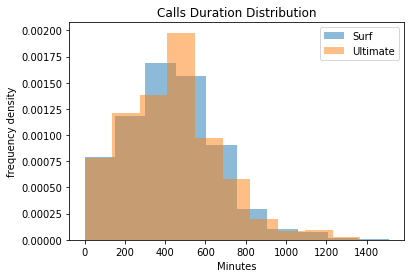

<Figure size 1080x720 with 0 Axes>

In [91]:
plt.hist(surf_users["duration"], density=True, alpha=0.5);
plt.hist(ultimate_users["duration"], density=True, alpha=0.5);

plt.legend(('Surf', 'Ultimate'), loc='upper right')
plt.title("Calls Duration Distribution")
plt.xlabel("Minutes")
plt.ylabel("frequency density")
plt.figure(figsize=(15,10))
plt.show();

The distribution is quite similar between both plans. Both have a wide curve, meaning a very dispersed distribution. They also share a very similar amount of calls that last between 0 and around 180 minutes, and decrease significantly after 550-600 minutes. We could say that both are skewed to the right.

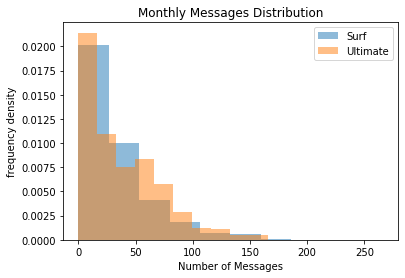

<Figure size 1080x720 with 0 Axes>

In [92]:
plt.hist(surf_users['number_of_messages'], density=True, alpha=0.5);
plt.hist(ultimate_users['number_of_messages'], density=True, alpha=0.5);

plt.legend(('Surf', 'Ultimate'), loc='upper right');
plt.title("Monthly Messages Distribution");
plt.xlabel("Number of Messages");
plt.ylabel("frequency density");
plt.figure(figsize=(15,10));
plt.show();

From this histogram we can confidently say that in both plans, there is a big amount users that don't send any messages monthly. The concentration lays in a range between 0 and around 15-20 messages sent per month. It seems Ultimate users send more messages than surf users though. 

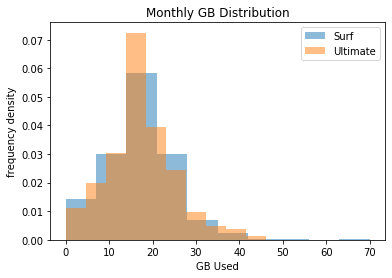

<Figure size 1080x720 with 0 Axes>

In [93]:
plt.hist(surf_users['gb_used'], density=True, alpha=0.5 );
plt.hist(ultimate_users['gb_used'], density=True, alpha=0.5);

plt.legend(('Surf', 'Ultimate'), loc='upper right');
plt.title("Monthly GB Distribution");
plt.xlabel("GB Used");
plt.ylabel("frequency density");
plt.figure(figsize=(15,10));
plt.show();

In both plans there is a peak between 15gb and 20gb. 

Surf users don't seem to give importance to going over the limit of 15GB, many of them go as far as almost 30GB. These bring a considerable amount of revenue. 

Ultimate users on the other side, tend to stay within the 30GB limit included in the plan.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

The histograms are built correctly!

</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

The histograms on the Internet will change, do not forget to update the conclusions 😉

</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

👍

</div>


### Conclusion

* Ultimate plan usage per month contains data that is far more dispersed than Surf plan.
* December is the month in which users from both plans use the service the most, most probably due to Catholic Holidays and NYE. January, on the opposite, is the month in which users make less use of the plans. 
* Even though surf plan displays a narrower distribution in general than Ultimate plan, they both have a similar skewness. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

 The analysis is also correct.

</div>


## Testing Hypotheses <a class="anchor" id="chapter4"></a>

* A) The average revenue from users of Ultimate and Surf calling plans differs.
* B) The average revenue from users in NY-NJ area is different from that of the users from other regions.

You decide what alpha value to use.
Explain:
* How you formulated the null and alternative hypotheses.
* What criterion you used to test the hypotheses and why.

**Hypothesis A**

Our first Hypotheses is the following:
H0= The average revenue from users of Ultimate and Surf calling plans is EQUAL.

The opposite would be:
H1= The average revenue from users of Ultimate and Surf calling plans is DIFFERENT.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b>

<s>Please note that the null hypothesis is always assumed to be equal. The alternative is the opposite.

</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

Correct :)

</div>


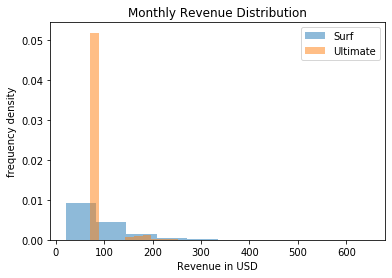

<Figure size 1080x720 with 0 Axes>

In [94]:
import pandas as pd
surf_revenue = pd.Series(surf_users["monthly_rev"]);
ultimate_revenue = pd.Series(ultimate_users["monthly_rev"]);
plt.hist(surf_users["monthly_rev"],density=True, alpha=0.5);
plt.hist(ultimate_users["monthly_rev"], density=True, alpha=0.5);

plt.legend(('Surf', 'Ultimate'), loc='upper right');
plt.title("Monthly Revenue Distribution");
plt.xlabel("Revenue in USD");
plt.ylabel("frequency density");
plt.figure(figsize=(15,10));
plt.show();

We see clearly that neither display a normal distribution. However, we can still use the ttest, even though it is not the best approach.

**Note to reviewer: ttest was the only method taught in the theory part** 

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

A small note. Yes, the distribution is not like normal. However, the normality of the distributions is a mandatory and strict condition when we have small samples (up to 30-50). With a large amount of data (as we have), the t-test already gives correct results even with an non normal distribution.

</div>


In [95]:
import scipy.stats as st

Let's begin by checking whether if the data is normally distributed or not, and the variance criteria.

In [96]:
# Shapiro-Wilk normality test for surf group 
st.shapiro(surf_users.monthly_rev)

(0.8427197933197021, 7.18040624088879e-37)

In [97]:
# Shapiro-Wilk normality test for ultimate group 
st.shapiro(ultimate_users.monthly_rev)

(0.2499614953994751, 0.0)

As both provide a p < 0.05, we confirm neither of them have a normal distribution. This means we need to use the counter test method of ttest:  The Mann Whitney U test. Before that, we need to get rid of the outliers.

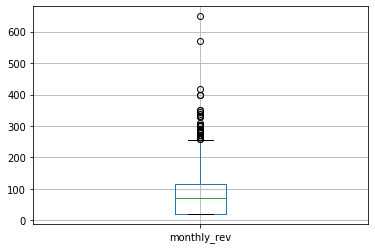

In [98]:
surf_users.boxplot(column='monthly_rev', return_type='axes');

In [99]:
Q1_rev_surf = surf_users['monthly_rev'].quantile(0.25)
Q3_rev_surf = surf_users['monthly_rev'].quantile(0.75)
IQR_rev_surf = Q3_rev_surf - Q1_rev_surf

In [100]:
surf_rev_outliers = Q3_rev_surf+1.5*IQR_rev_surf
surf_rev_outliers

258.5

In [101]:
surf_users["monthly_rev"] = surf_users["monthly_rev"].astype("int")
surf_new = surf_users[surf_users["monthly_rev"]< 259]
surf_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 1 to 2302
Data columns (total 14 columns):
user_id               1539 non-null object
first_name            1539 non-null object
last_name             1539 non-null object
age                   1539 non-null int64
city                  1539 non-null object
reg_date              1539 non-null datetime64[ns]
plan                  1539 non-null object
churn_date            1539 non-null object
month                 1539 non-null int64
gb_used               1539 non-null int64
number_calls          1539 non-null int64
duration              1539 non-null int64
number_of_messages    1539 non-null int64
monthly_rev           1539 non-null int64
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 180.4+ KB


We have found the limit, above which outliers are held within the surf users table, and withdrawn them. Let's do the same for ultimate users table.

(0, 100)

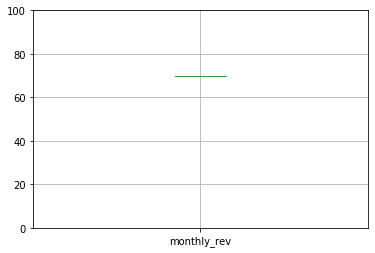

In [102]:
ultimate_users.boxplot(column='monthly_rev', return_type='axes');
plt.ylim(0, 100)

In [103]:
Q1_rev_ult = ultimate_users['monthly_rev'].quantile(0.25)
Q3_rev_ult = ultimate_users['monthly_rev'].quantile(0.75)
IQR_rev_ult = Q3_rev_ult - Q1_rev_ult

In [104]:
ult_rev_outliers = Q3_rev_ult+1.5*IQR_rev_ult
ult_rev_outliers

70.0

In [105]:
ultimate_users["monthly_rev"] = ultimate_users["monthly_rev"].astype("int")
ultimate_new = ultimate_users[ultimate_users["monthly_rev"]< 71]
ultimate_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 0 to 2287
Data columns (total 14 columns):
user_id               679 non-null object
first_name            679 non-null object
last_name             679 non-null object
age                   679 non-null int64
city                  679 non-null object
reg_date              679 non-null datetime64[ns]
plan                  679 non-null object
churn_date            679 non-null object
month                 679 non-null int64
gb_used               679 non-null int64
number_calls          679 non-null int64
duration              679 non-null int64
number_of_messages    679 non-null int64
monthly_rev           679 non-null int64
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 79.6+ KB


In [106]:
s, p = st.mannwhitneyu(surf_new.monthly_rev, ultimate_new.monthly_rev, alternative="two-sided")
s, p

(526564.5, 0.7642146315732313)

In [107]:
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Same distribution (fail to reject H0)


Since p > alpha, we fail to reject H0 "The average revenue from users of Ultimate and Surf calling plans is EQUAL"

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b>

<s>There is an error in the code here. Fix it, please. 
    
    
Also note that this approach to testing hypotheses is not suitable in this case. It is better to use the test for independent samples. It is also worth comparing the Series with the revenue for one tariff, also with the Series with the revenue for another tariff, and not with a given number.</s>

</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 
  
You have a great job in the project and I want it to get even better. Therefore, before testing the hypothesis using the Student's T-test, check the sample variance to understand which parameter `equal_var` to use (by default True). Here [variances](https://numpy.org/doc/stable/reference/generated/numpy.var.html) (pay attention to the `ddof` parameter) can be calculated manually, or use [stat.Levene test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) (there's a good example at the end). If the variances differ by more than 5%, we consider this difference significant and use `eval_var=False`. But I do recommend using the Leven test for this, it is very simple. [Here](http://pytolearn.csd.auth.gr/d1-hyptest/12/ttest-indep.html) is another link with an example code.

</div>

<div class="alert alert-block alert-info">
I have made the changes. I saw something strange in the revenue ltimate. The boxplot was basically 70. I tried to figure it out but i am so lost in the stats topic that i didn't know how to troubleshoot, if needed.
    
If this hypotheses is still incorrect, i would need you to specify exactly what should be done, step by step, because the theory on this course is not very clear for me...it only covered ttest, no other test whatsoever, so it is extremely confusing for me on how to approach this. 
    

    Thanks a lot in advance :)

    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

The Mann-Whitney test is great in this case! Well done for mastering and applying it.
    
About boxplot on ultimate tariff. Due to the fact that the absolute majority of users do not overpay on this tariff, we got very few values other than 70 (I output value_counts and the graph below). Therefore, these values could not affect the median and whiskers of the graph.

</div>


In [108]:
ultimate_users["monthly_rev"].value_counts()

70     679
196      6
161      6
182      5
147      5
189      4
175      4
154      4
252      2
238      1
224      1
210      1
203      1
168      1
Name: monthly_rev, dtype: int64

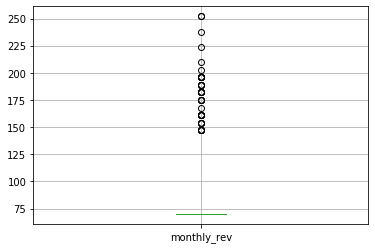

In [109]:
ultimate_users.boxplot("monthly_rev")

<div class="alert alert-block alert-danger">
<b>Reviewer's comment (v2)</b>

<s>One small note. When performing the Mann-Whitney test, the default parameter is `alternative=None`. As the [documentation says](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html), this option is not recommended. Please note that our hypothesis is two-sided, and therefore we need to select `two-sided` in this parameter.

</div>

<div class="alert alert-block alert-info">
Thank you, i specified the alternative="two-sided" on both hypotheses now. 
 /div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v3)</b>

👍

</div>


Given the output, we cannot reject that "The average revenue from users of Ultimate and Surf calling plans differ".

Our second hypotheses is:
H0 = average revenue from users in NY-NJ area is EQUAL from that of the users from other regions. 
Therefore:
H1 = average revenue from users in NY-NJ area is DIFFERENT from that of the users from other regions.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment (v2)</b>

<s>Please correct the wording of the hypotheses here too 😊

</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment (v3)</b>

👍

</div>


In [110]:
revenue["city"].value_counts()

new york-newark-jersey city, ny-nj-pa msa          378
los angeles-long beach-anaheim, ca msa             132
chicago-naperville-elgin, il-in-wi msa              94
dallas-fort worth-arlington, tx msa                 89
philadelphia-camden-wilmington, pa-nj-de-md msa     82
                                                  ... 
omaha-council bluffs, ne-ia msa                      3
el paso, tx msa                                      2
jacksonville, fl msa                                 2
raleigh-cary, nc msa                                 2
cape coral-fort myers, fl msa                        1
Name: city, Length: 73, dtype: int64

In [111]:
revenue_NY_NJ = revenue[revenue["city"]=="new york-newark-jersey city, ny-nj-pa msa"]

In [112]:
revenue_other_regions = revenue[revenue["city"] != "new york-newark-jersey city, ny-nj-pa msa"]

In [113]:
# Shapiro-Wilk normality test for NY NJ group 
st.shapiro(revenue_NY_NJ.monthly_rev)

(0.8882215023040771, 5.64481549593783e-16)

In [114]:
# Shapiro-Wilk normality test for other regions group 
st.shapiro(revenue_other_regions.monthly_rev)

(0.7930676937103271, 3.6433760072445244e-44)

As both provide a p < 0.05, we confirm neither of them have a normal distribution. This means we need to use the counter test method of ttest: The Mann Whitney U test. Before that, we need to get rid of the outliers.

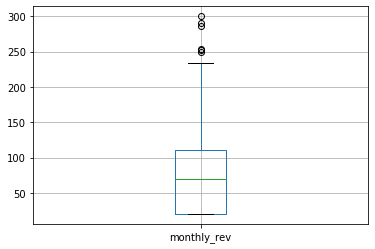

In [115]:
revenue_NY_NJ.boxplot(column='monthly_rev', return_type='axes');

In [116]:
Q1_rev_NYNJ = revenue_NY_NJ['monthly_rev'].quantile(0.25)
Q3_rev_NYNJ = revenue_NY_NJ['monthly_rev'].quantile(0.75)
IQR_rev_NYNJ = Q3_rev_NYNJ - Q1_rev_NYNJ

In [117]:
NYNJ_rev_outliers = Q3_rev_NYNJ+1.5*IQR_rev_NYNJ
NYNJ_rev_outliers

245.0

In [118]:
revenue_NY_NJ["monthly_rev"] = revenue_NY_NJ["monthly_rev"].astype("int")
revenue_NY_NJ = revenue_NY_NJ[revenue_NY_NJ["monthly_rev"]< NYNJ_rev_outliers]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Let's do now the same for other regions.

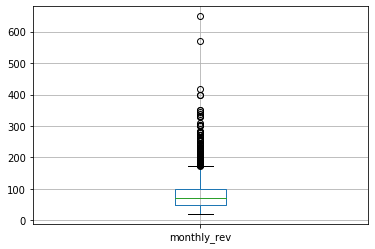

In [119]:
revenue_other_regions.boxplot(column='monthly_rev', return_type='axes');

In [120]:
Q1_rev_other = revenue_other_regions['monthly_rev'].quantile(0.25)
Q3_rev_other = revenue_other_regions['monthly_rev'].quantile(0.75)
IQR_rev_other = Q3_rev_other - Q1_rev_other

In [121]:
other_rev_outliers = Q3_rev_other+1.5*IQR_rev_other
other_rev_outliers

173.685

In [122]:
revenue_other_regions["monthly_rev"] = revenue_other_regions["monthly_rev"].astype("int")
revenue_other_regions = revenue_other_regions[revenue_other_regions["monthly_rev"] < other_rev_outliers]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
s, p = st.mannwhitneyu(revenue_NY_NJ.monthly_rev, revenue_other_regions.monthly_rev, alternative="two-sided")
s, p

(347623.0, 0.23232218984814812)

In [124]:
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Same distribution (fail to reject H0)


After running the Mannwhitneyt test again, we confirm that **we cannot reject** our initial hypothesis "average revenue from users in NY-NJ area is EQUAL from that of the users from other regions"

## Final Conclusion <a class="anchor" id="chapter1"></a>

We initiated our report with a given sample of data of 500 users, extracted from a larger dataset. 
We didn't see any missing values, however we had to adjust some data types in order to calculate monthly use of data, messaging and calls for each user. For that we had to group the data by users and months of the year. There were also no duplicates found.

Once data was ready to analyze, we split it into 2 groups: Surf users, and Ultimate users. 

From each of them, we found and anlyzed the mean, dispersion and standard deviation, in order to get a more detailed picture of the data in each of the plans. 

We have also compared how Megaline gets the revenue from each of the plans - are users being charged only the plan cost, or do they also pay fees? 
Based on the density histograms, we saw that there is a big amount of users on both plans that go beyond the limit within each package.
At the end of step 2, we calculated the revenuebased on the plan used, and found out that the surf plan brings in more revenue than the ultimate plan. After our EDA (step 3), we saw that surf users tend to go beyond the plan limits much more than those in ultimate plan, therefore the fees collected are much higher. 


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

The general conclusion is good.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

However, it would be great to reinforce it with the numbers found in the study. General conclusion this is the most important part of the project, it is worth paying special attention to. You can also leave a recommendation - which of the tariffs to focus on in the advertising campaign for 2019?

</div>


<div class="alert alert-block alert-info">
I will note it for coming projects. I am not sure if the numbers are correct here. Thank you for your time.

    
</div>

For the upcoming year, I would focus on promoting the surf plan. Even though the plan cost is lower than the ultimate, users who book this plan tend to overuse our services, and therefore more fees are applied to them, creating more revenue for Megaline.

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

👍

</div>
